# Exercice incidence de la varicelle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Télécharger la base de données pour la varicelle à partir du réseau Sentinelles. Les données sont disponibles depuis la semaine 49 en 1990.

In [2]:
data_url = "https://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

Descriptif des variables sour le [fichier d'origine](https://www.sentiweb.fr/france/fr/?page=table&maladie=7)

Schema
Name	Type	Label	Description
week PK	integer		ISO8601 Yearweek number as numeric (year*100 + week nubmer)
geo_insee PK	string		Identifier of the geographic area, from INSEE https://www.insee.fr
geo_name	string		Geographic label of the area, corresponding to INSEE code. This label is not an id and is only provided for human reading
indicator PK	integer		Unique identifier of the indicator, see metadata document https://www.sentiweb.fr/meta.json
inc	integer		Estimated incidence value for the time step, in the geographic level
inc_low	integer		Lower bound of the estimated incidence 95% Confidence Interval
inc_up	integer		Upper bound of the estimated incidence 95% Confidence Interval
inc100	integer		Estimated rate incidence per 100,000 inhabitants
inc100_low	integer		Lower bound of the estimated incidence 95% Confidence Interval
inc100_up	integer		Upper bound of the estimated rate incidence 95% Confidence Interval
Missing value : -

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant skiprows=1.

In [3]:
raw_data = pd.read_csv(data_url, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202106          7  14719    10462   18976      22          16   
1     202105          7  12379     9107   15651      19          14   
2     202104          7  12026     8826   15226      18          13   
3     202103          7   8913     6375   11451      13           9   
4     202102          7   7795     5430   10160      12           8   
5     202101          7  10525     7750   13300      16          12   
6     202053          7  11978     8406   15550      18          13   
7     202052          7  12012     8285   15739      18          12   
8     202051          7  10564     7574   13554      16          11   
9     202050          7   7063     4744    9382      11           7   
10    202049          7   5026     3145    6907       8           5   
11    202048          7   6683     4312    9054      10           6   
12    202047          7   4999     2963    7035       8           5   
13    202046          7   3752     1963    5541       6           3   
14    202045          7   3696     2016    5376       6           3   
15    202044          7   4391     2375    6407       7           4   
16    202043          7   4376     2505    6247       7           4   
17    202042          7   4000     1979    6021       6           3   
18    202041          7   3961     2099    5823       6           3   
19    202040          7   2078      675    3481       3           1   
20    202039          7   1049      237    1861       2           1   
21    202038          7   2253      782    3724       3           1   
22    202037          7   1584      405    2763       2           0   
23    202036          7    919      100    1738       1           0   
24    202035          7    828        0    1694       1           0   
25    202034          7   2272      371    4173       3           0   
26    202033          7   1284      177    2391       2           0   
27    202032          7   2650      689    4611       4           1   
28    202031          7   1303      100    2506       2           0   
29    202030          7   1385       75    2695       2           0   
...      ...        ...    ...      ...     ...     ...         ...   
1546  199126          7  17608    11304   23912      31          20   
1547  199125          7  16169    10700   21638      28          18   
1548  199124          7  16171    10071   22271      28          17   
1549  199123          7  11947     7671   16223      21          13   
1550  199122          7  15452     9953   20951      27          17   
1551  199121          7  14903     8975   20831      26          16   
1552  199120          7  19053    12742   25364      34          23   
1553  199119          7  16739    11246   22232      29          19   
1554  199118          7  21385    13882   28888      38          25   
1555  199117          7  13462     8877   18047      24          16   
1556  199116          7  14857    10068   19646      26          18   
1557  199115          7  13975     9781   18169      25          18   
1558  199114          7  12265     7684   16846      22          14   
1559  199113          7   9567     6041   13093      17          11   
1560  199112          7  10864     7331   14397      19          13   
1561  199111          7  15574    11184   19964      27          19   
1562  199110          7  16643    11372   21914      29          20   
1563  199109          7  13741     8780   18702      24          15   
1564  199108          7  13289     8813   17765      23          15   
1565  199107          7  12337     8077   16597      22          15   
1566  199106          7  10877     7013   14741      19          12   
1567  199105          7  10442     6544   14340      18          11   
1568  199104          7   7913     4563   11263      14           8   
1569  199103          7  15387    10484   20290      27          18   
1570  199102          7  16277  

In [ ]:
On recherche des points manquants dans ce jeu de données.

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Il n'y a pas de données manquantes. On peut continuer.
Il faut maintenant faire comprendre que la variable **week** est en fait comprise de l'année suivie du numéro de semaine. 
Nous utilisons donc le code python pour créer une nouvelle variable **period**. 

In [7]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

raw_data['period'] = [convert_week(yw) for yw in raw_data['week']]

__*Attention*__ : comme il n'y a pas eu de nettoyage de la base, elle s'appelle toujours **raw_data**

On considère que la période est un index du jeu de données et on trie par ordre croissant.

In [8]:
sorted_data = raw_data.set_index('period').sort_index()

Nous vérifions maintenant qu'il n'y a pas de saut dans le jeu de données, c'est à dire que la fin d'une période est directement suivie du début de la suivante. 

In [9]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Il n'y a pas d'erreur. On peut continuer et visualiser les données.

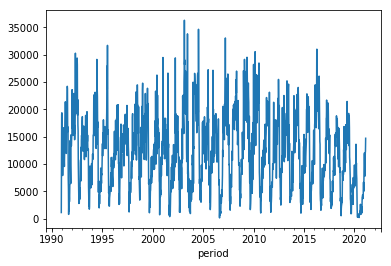

In [10]:
sorted_data['inc'].plot()

Il y a beaucoup  d'information. Regardons une période plus courte.

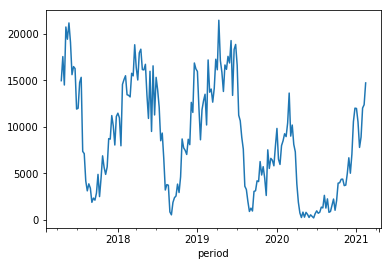

In [11]:
sorted_data['inc'][-200:].plot()

Le pic d'incidence est beaucoup plus large que pour la grippe. On détermine le creux de chaque vaguer au 1er septembre. Il faut donc recoder les périodes/années du 1er septembre de l'année N-1 au 31 aout de l'année N. Comme la première donnée est en novembre 1990, cette année est incomplète, on commence donc le 1er septembre 1991.

In [13]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

On vérifie que les années créées ont bien entre 51 et 52 semaines.

In [14]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

On peut maintenant visualiser les données par année.

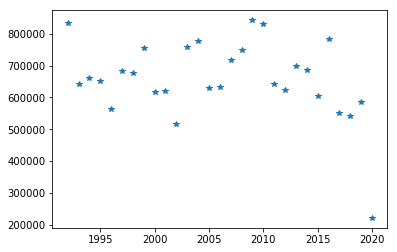

In [15]:
yearly_incidence.plot(style='*')

Pour répondre à la question de l'exercice, on peut trier ces données dans une liste. Les valeurs les plus faibles sont en début, les plus fortes en fin de liste.

In [16]:
yearly_incidence.sort_values()

2020    221186
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

L'année 2020 n'est pas encore terminée (elle dure jusuq'au 31 aout 2021). L'année avec l'incidence la plus faible est donc **2002** et celle avec l'incidence la plus forte est **2009**.